# <span style="color:red"> Numerical Simulation 01 </span>

## Exercise 01.1 part 1

We want to test the pseudo-random number generator doing an estimation of $\langle r \rangle = \int_0^1 r dr = 1/2$. To calculate this, with the relative uncertainty, I've used the blocking method, dividing my $M$ Monte Carlo steps, in $N$ blocks (each one made by $M/N$ steps), and calculate for each block an estimate of the quantity I want to compute (in this case $\langle r \rangle$). With this $N$ estimations I can calculate error as the Standard Deviation of the mean. In this case, in each block I've calculated an estimate of $\langle r \rangle$ with a simple mean of $M/N$ random generated numbers. The plot I've reported shows the progressive mean of $\langle r \rangle$, as a function of the number of blocks. I've used $M=10^5$ and $N=100$, and plotted $\langle r \rangle -1/2$. The results are compatible with the expectational value.

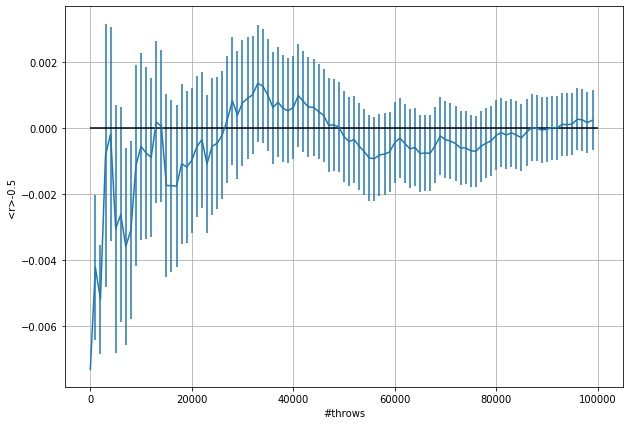

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#loading datas from files
x=np.loadtxt("x.dat")
sum_prog, err_prog =np.loadtxt("stat.dat",unpack=True)

#plotting
fig=plt.figure(figsize=(10,7))
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.hlines(0, 0, 100000)
plt.xlabel('#throws')
plt.ylabel('<r>-0.5')
plt.grid(True)
plt.show()

## Exercise 01.1 part 2

We want to make an estimation of $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. I've followed the same procedure as in the exercise before, with the only difference that I've used $ (r-1/2)^2$, with $r$ randomly generetad in $(0,1)$, to calculate the mean. I'm still using $M=10^5$ and $N=100$, but now I'm plotting $\langle (r-1/2)^2 \rangle -1/12$, and the results are compatible with the expected ones. Testing the random generator I've noticed a large dependence from it's seed, that make the results fluctuates a lot. That's probably because the generator is pseudo-random, and I don't have a set of datas large enough.

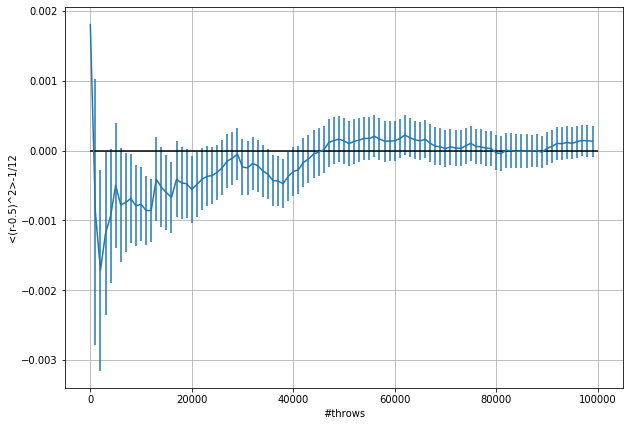

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#loading datas from files
x=np.loadtxt("x.dat")
sum_prog, err_prog =np.loadtxt("stat2.dat",unpack=True)

#plotting
fig=plt.figure(figsize=(10,7))
plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.hlines(0, 0, 100000)
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

## Exercise 01.1 part 3

Now we use the $\chi^2$ formula to test the effective uniformity of the generator:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
I've divided $[0,1]$ in to $M=100$ identical sub-intervals, taken as $n$ the first $10^4$ randomly generated numbers and calculated the $\chi^2$ counting how many numbers of this $n$ were in each sub-interval. I've repeated this operation $100$ times, with different sets of numbers, and calculated a $\chi^2$ each time. The plot shows that the value of $\chi^2$ fluctuates around the expectation value of $\chi^2=100$.

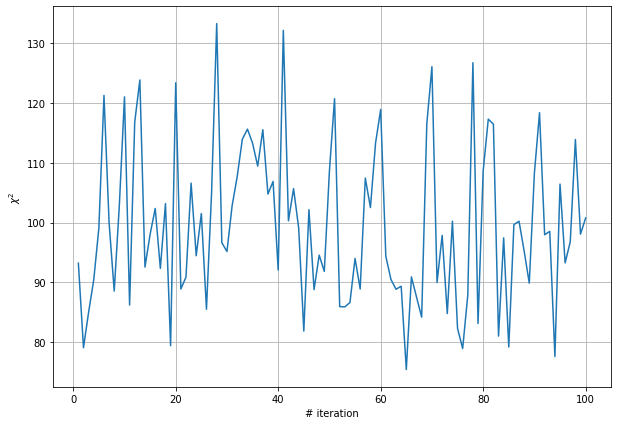

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

y=np.loadtxt("CHI.dat")
x=np.arange(100)
x+=1

fig=plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.xlabel("# iteration")
plt.ylabel("$\chi^2$")
plt.grid(True)
plt.show()

## Exercise 01.2

In this exercise I've first added two methods to the class of the pseudo-random generator: the first to generate numbers from an exponential distribution ($p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ ), and the second form a Cauchy-Lorentz distribution ($p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$). The method used to achieve this goal is the method of the inversion of the cumulative distribution, that in this case has the following results:
1. $x=-1/\lambda \ln(1-y)$
2. $x=\Gamma \tan(\pi(y-1/2))+\mu$

where $y$ is extracted from a $[0,1)$ uniform distrubution.

Then I've used these generators (plus the uniform one) to test the Central Limit Theorem. For each distribution I've filled $4$ istograms with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (uniform distribution in $(0,1)$), an *exponential* dice (using $\lambda=1$) and a *Lorentzian* dice (using $\mu=0$ and $\Gamma=1$). For the *standard* and the *exponential* ones I've fitted the $N=100$ istograms with a Gaussian function, that fits very well and verify the Central Limit Theorem. For the *Lorentzian* distribution the theorem fails because one of it's hypotesis is that the distribution should have a finite variance (and that's not true for the *Lorentzian* distribution). So in this case, I've fitted my histogram with a Cauchy Lorentz function.

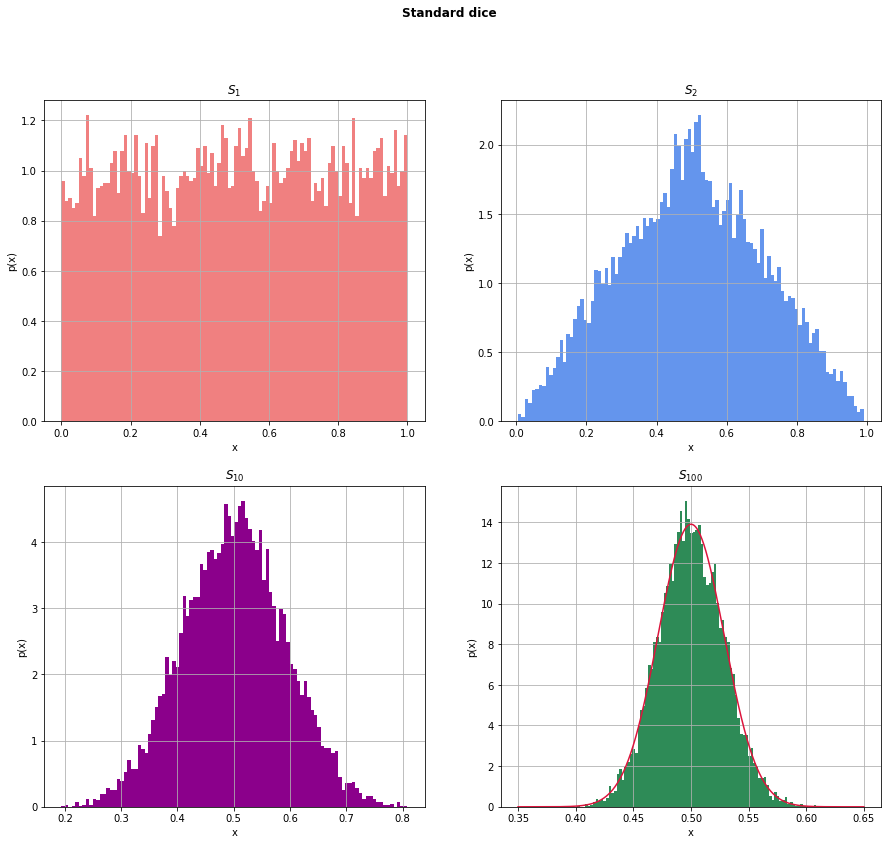

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

s1, s2, s10, s100=np.loadtxt("standard.dat", unpack=True)
fig=plt.figure(figsize=(15,13))
plt.suptitle("Standard dice", weight="bold")

#N=1
plt.subplot(221)
plt.hist(s1,100,color="lightcoral",density=True)
plt.title("$S_1$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=2
plt.subplot(222)
plt.hist(s2,100,color="cornflowerblue",density=True)
plt.title("$S_2$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=10
plt.subplot(223)
plt.hist(s10,100,color="darkmagenta",density=True)
plt.title("$S_{10}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=100
plt.subplot(224)
plt.hist(s100,100,color="seagreen",density=True)
plt.title("$S_{100}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#fit Gaussiano
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(s100))
m, s = stats.norm.fit(s100)             # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s)    # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, color="crimson")
plt.show()  

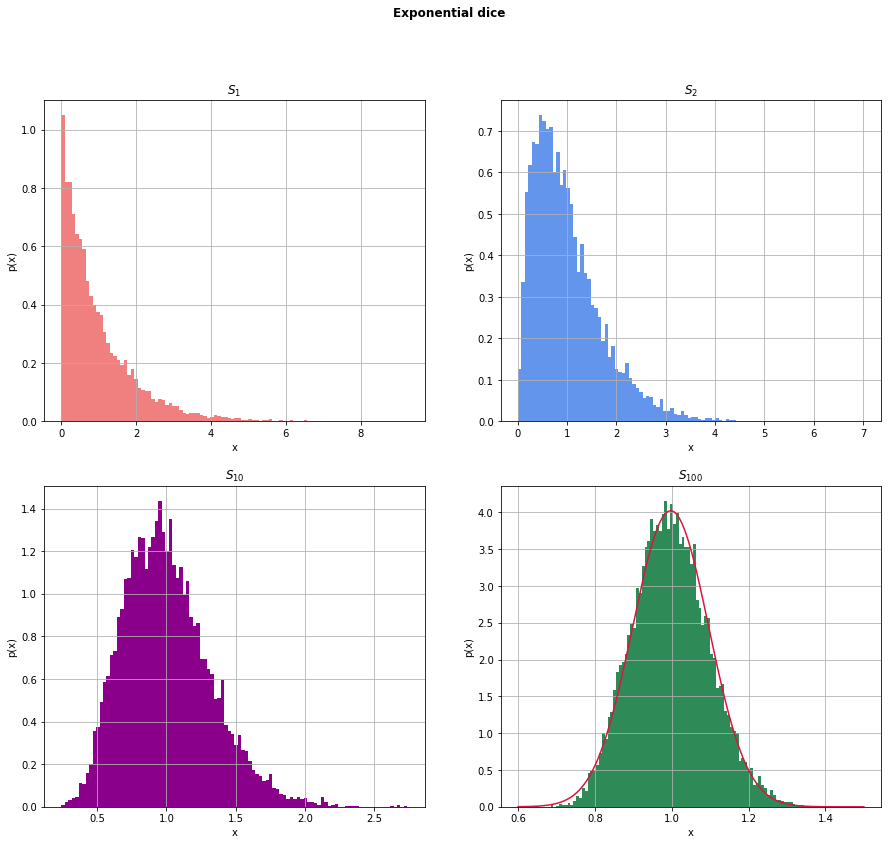

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

e1, e2, e10, e100=np.loadtxt("exponential.dat", unpack=True)
fig=plt.figure(figsize=(15,13))
plt.suptitle("Exponential dice", weight="bold")

#N=1
plt.subplot(221)
plt.hist(e1,100,color="lightcoral",density=True)
plt.title("$S_1$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=2
plt.subplot(222)
plt.hist(e2,100,color="cornflowerblue",density=True)
plt.title("$S_2$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=10
plt.subplot(223)
plt.hist(e10,100,color="darkmagenta",density=True)
plt.title("$S_{10}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=100
plt.subplot(224)
plt.hist(e100,100,color="seagreen",density=True)
plt.title("$S_{100}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#fit Gaussiano
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(e100))
m, s = stats.norm.fit(e100) 
pdf_g = stats.norm.pdf(lnspc, m, s)    
plt.plot(lnspc, pdf_g, color="crimson")
plt.show() 

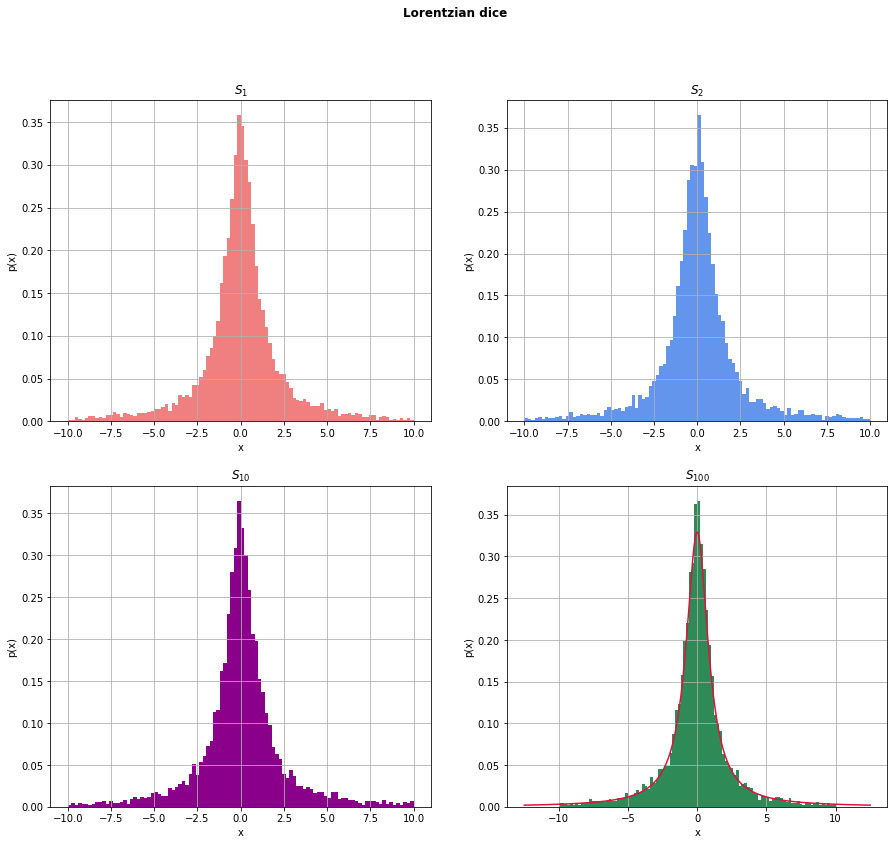

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import cauchy

l1, l2, l10, l100=np.loadtxt("lorentz.dat", unpack=True)
fig=plt.figure(figsize=(15,13))
plt.suptitle("Lorentzian dice", weight="bold")

#N=1
plt.subplot(221)
plt.hist(l1,100,range=(-10,10),color="lightcoral",density=True)
plt.title("$S_1$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=2
plt.subplot(222)
plt.hist(l2,100,range=(-10,10),color="cornflowerblue",density=True)
plt.title("$S_2$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=10
plt.subplot(223)
plt.hist(l10,100,range=(-10,10),color="darkmagenta",density=True)
plt.title("$S_{10}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=100
plt.subplot(224)
plt.hist(l100,100,range=(-10,10),color="seagreen",density=True)
plt.title("$S_{100}$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#fit Lorentiano
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(l100))
p, m = stats.cauchy.fit(l100) 
pdf_l = stats.cauchy.pdf(lnspc, p, m)
plt.plot(lnspc, pdf_l, color="crimson")
plt.show() 

## Exercise 01.3

Buffon's experiment consists in throwing a needle of lenth $L$ on a plane divided in straight lines spaced of a distance $d$ (with $d > L$, but not too much), and counting how many times the needle hits a line. With this counting you can calculate $\pi$ from:$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

Due to periodic boundary conditions we can reduce the problem to the space between just two lines. For this simulation I've used $L=5$ and $d=8$. I've generated (casually) the middle point of the needle ($y_0$) in $[0,d]$, and then generated an angle $\theta$, which represent the orientation of the needle. To sample uniformly the angles between $0-2\pi$ I've used the formula $\theta=\arctan(y/x)$, where $y$ and $x$ are randomly genereted in a unitary circonference. 

Once the needle is set I've just compared the extremal point of the needle whit the lines and set the condition that the needle hits a line when: $$y_{max} > d \space \space or \space \space y_{min} <0$$

- $Y_{max}= y_0+ |L/2 \sin(\theta)|$
- $Y_{min}= y_0- |L/2 \sin(\theta)|$

To make a good estimation of $\pi$ I've used the blocking method, with $M=10^5$ throws divided in $N=100$ blocks, in which I've done an estimation of $\pi$ and it's uncertainty (exept for the first block), with $M/N$ throws. In the plot we can see the progressive convergence to $\pi$ of the calculation, as a function of the number of blocks.

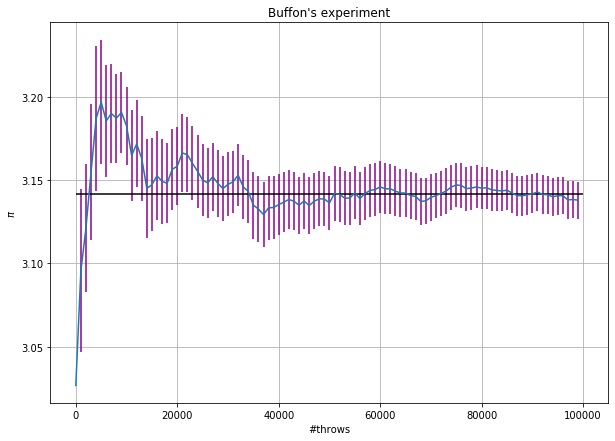

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(100)
x*=1000
PI,err =np.loadtxt("PI.dat", unpack=True)

fig=plt.figure(figsize=(10,7))
plt.errorbar(x,PI, yerr=err, ecolor="darkmagenta")
plt.hlines(3.14159, 0, 100000)
plt.xlabel('#throws')
plt.ylabel('$\pi$')
plt.title("Buffon's experiment")
plt.grid(True)
plt.show()